In [1]:
def cmpr_feature_vect(feature_vector1,feature_vector2):
    
    dist = (abs(feature_vector1**2 - feature_vector2**2))**(0.5)

    for idx, val in enumerate(dist):
        if np.isnan(val):
            dist[idx] = 0

    dist = np.sum(dist)

    return dist

In [2]:
from scipy.io import loadmat
import os

dataDir = "/home/dunga/Desktop/AutoSIGN_Related_Stuff/test_train/mat_files_GDPS/"
mats = []
strings = []
for file in os.listdir( dataDir ) :
    strings.append(str(file))
    mats.append( loadmat( dataDir+file ) )
    
    
from sets import Set

string_set = Set()

for string in strings:
    #print(string)
    string_set.add(string)

/home/dunga/anaconda3/envs/AutoSIGN/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: the sets module is deprecated
  if sys.path[0] == '':


In [3]:
from scipy.io import loadmat
import numpy as np

real_mat = np.zeros((960,24,2048))
forg_mat = np.zeros((960,30,2048))

for index in range(2,960):
    
    str_real = 'real'
    str_forg = 'forg'

    name_string = '{}_{}.mat'
    real_name = name_string.format(str_real,index)
    forg_name = name_string.format(str_forg,index)
    
    if real_name in string_set:
        features_real = loadmat(dataDir+real_name)['features']
        features_forg = loadmat(dataDir+forg_name)['features']
        
        if (np.shape(features_forg) != (30,2048)):
            less = 30 - np.shape(features_forg)[0]
            temp = np.zeros((less,2048))
            features_forg = np.vstack([features_forg,temp])
        
        real_mat[index] = features_real
        forg_mat[index] = features_forg

Distance between Forgeries and Real Signs

In [4]:
empty_array = np.zeros((1,2048))

distance_forg = []

for index in range (2,960):
    
    if (real_mat[index][1] != empty_array).any():
        
        print(index)
        
        for index_2 in range(1,24):
            for index_3 in range(1,30):
                
                if (forg_mat[index][index_3] != empty_array).any():
                    
                    dist = cmpr_feature_vect(forg_mat[index][index_3],real_mat[index][index_2])
                    distance_forg.append(dist)
                    


2
3
5
7
12
13
14
16
17
19
21
22
42
43
46
47
48
49
50
51
52
53
55
57
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
123
125
126
127
129
131
132
133
134
135
136
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
166
167
168
169
170
171
172
173
174
175
177
178
179
180
181
182
183
184
185
186
187
188
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
284
285
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314

In [5]:
np.shape(distance_forg)

(584361,)

In [6]:
empty_array = np.zeros((1,2048))

distance_same = []

for index in range (2,960):
    
    if (real_mat[index][1] != empty_array).any():
        
        print(index)
        
        for index_2 in range(1,24):
            for index_3 in range(1,24):
                if (index_2!=index_3):
                    
                    dist = cmpr_feature_vect(real_mat[index][index_3],real_mat[index][index_2])
                    distance_same.append(dist)

2
3
5
7
12
13
14
16
17
19
21
22
42
43
46
47
48
49
50
51
52
53
55
57
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
123
125
126
127
129
131
132
133
134
135
136
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
166
167
168
169
170
171
172
173
174
175
177
178
179
180
181
182
183
184
185
186
187
188
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
284
285
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314

In [13]:
np.shape(distance_same)
dist_same = np.array(distance_same)

print("Distance Same All")
print(dist_same.max())
print(dist_same.min())
dist_same_mean = dist_same.mean()
print(dist_same_mean)
print(dist_same.std())

distance_same_above = []
distance_same_below = []

for distance in dist_same:
    if(distance>dist_same_mean):
        distance_same_above.append(distance)
    else:
        distance_same_below.append(distance)
        

dist_same_above = np.array(distance_same_above)
dist_same_below = np.array(distance_same_below)

print("Distance Same Above")
print(dist_same_above.max())
print(dist_same_above.min())
print(dist_same_above.mean())
print(dist_same_above.std())

print("Distance Same Below")
print(dist_same_below.max())
print(dist_same_below.min())
print(dist_same_below.mean())
print(dist_same_below.std())

Distance Same All
1512.45365342
167.887762879
767.018211126
131.375950188
Distance Same Above
1512.45365342
767.01993392
881.81078186
95.1501163954
Distance Same Below
767.017991917
167.887762879
671.710670483
63.6293831612


In [14]:
np.shape(distance_forg)
dist_forg = np.array(distance_forg)

print("Distance Forg All")
print(dist_forg.max())
print(dist_forg.min())
dist_forg_mean = dist_forg.mean()
print(dist_forg_mean)
print(dist_forg.std())

distance_forg_above = []
distance_forg_below = []

for distance in dist_forg:
    if(distance>dist_forg_mean):
        distance_forg_above.append(distance)
    else:
        distance_forg_below.append(distance)
        

dist_forg_above = np.array(distance_forg_above)
dist_forg_below = np.array(distance_forg_below)

print("Distance Forg Above")
print(dist_forg_above.max())
print(dist_forg_above.min())
print(dist_forg_above.mean())
print(dist_forg_above.std())

print("Distance Forg Below")
print(dist_forg_below.max())
print(dist_forg_below.min())
print(dist_forg_below.mean())
print(dist_forg_below.std())

Distance Forg All
2380.43710459
465.855980127
1113.70655537
267.438651705
Distance Forg Above
2380.43710459
1113.7066462
1356.1574618
194.426152458
Distance Forg Below
1113.70623152
465.855980127
919.632882036
117.468022676


In [9]:
num = np.random.randint(1,25,2)
num

array([13, 18])

In [10]:
empty_array = np.zeros((1,2048))

distance_diff = []

for index in range (2,960):
    if (real_mat[index][1] != empty_array).any():
        print(index)
        for index_2 in range(2,960):
            if (real_mat[index_2][1] != empty_array).any():
                if (index_2!=index):
                    
                    num = np.random.randint(1,24,2)
                    
                    dist = cmpr_feature_vect(real_mat[index][num[0]],real_mat[index_2][num[1]])
                    distance_diff.append(dist)

2
3
5
7
12
13
14
16
17
19
21
22
42
43
46
47
48
49
50
51
52
53
55
57
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
123
125
126
127
129
131
132
133
134
135
136
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
166
167
168
169
170
171
172
173
174
175
177
178
179
180
181
182
183
184
185
186
187
188
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
284
285
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314

In [15]:
np.shape(distance_diff)
dist_diff = np.array(distance_diff)
print("Distance Diff All")
print(dist_diff.max())
print(dist_diff.min())
dist_diff_mean = dist_diff.mean()
print(dist_diff_mean)
print(dist_diff.std())

distance_diff_above = []
distance_diff_below = []

for distance in dist_diff:
    if(distance>dist_diff_mean):
        distance_diff_above.append(distance)
    else:
        distance_diff_below.append(distance)
        

dist_diff_above = np.array(distance_diff_above)
dist_diff_below = np.array(distance_diff_below)

print("Distance Diff Above")
print(dist_diff_above.max())
print(dist_diff_above.min())
print(dist_diff_above.mean())
print(dist_diff_above.std())

print("Distance Diff Below")
print(dist_diff_below.max())
print(dist_diff_below.min())
print(dist_diff_below.mean())
print(dist_diff_below.std())

Distance Diff All
2587.97194635
634.920587805
1264.68946235
195.365910803
Distance Diff Above
2587.97194635
1264.69025921
1432.37613537
146.006341373
Distance Diff Below
1264.68899651
634.920587805
1123.99161745
94.4289060722


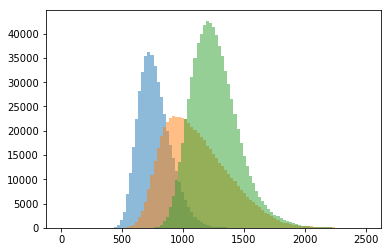

In [16]:
import numpy
import matplotlib.pyplot as plt

histogram=plt.figure()

bins = numpy.linspace(0, 2500, 100)

plt.hist(dist_same, bins, alpha=0.5)
plt.hist(dist_forg, bins, alpha=0.5)
plt.hist(dist_diff, bins, alpha=0.5)
plt.show()